# [IAPR 2018:][iapr2018] Lab 3 ‒  Classification

**Author:** Axel MANGUY, Quentin DESAULTY, Christine ROTH
**Due date:** 25.05.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
#### Theory
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

The decision surface or curve for two classes is defined by $P(w_i|x)-P(w_j|x)=0$. $P(w_i|x)$ is the probability following the Bayes Rule:
 
$ P(w_i|x)=\frac{p(x|w_i)P(w_i)}{p(x)} $

Where $p(x|w_i)$ is the conditional probability distribution function, $w_i$ one of the available classes and $x$ a feature vector. The conditional probability distribution function for the data set has to be known, or assumed for this approach. Often, this distribution is assumed to be a gaussian function. To simplify this criterion it can also be formulated using a discriminant function $g_i(x)=f(P(w_i|x))$ where $f$ is a monotonnally increasing function. Thus the decision criterion will be to find the class for which the dicriminant function is maximal for a given feature.

$g_{ij}=g_i(x)-g_j(x)=0$


For a gaussian distribution $g_i$ is defined as:

$g_i(x)=ln(p(x|w_i)P(w_i))$

with

$p(x|w_i)=\frac{exp(-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i))}{\sqrt{2\pi|\Sigma_i|}}$

$\Sigma_i$ is the covariance matrix of class $i$ of the training set and $\mu_i$ is the center of class $i$. Thus $g_i$ can be written as:

$g_i(x)=ln( p(x|w_i )P(w_i)=ln\left(\frac{1}{\sqrt{2\pi}|\Sigma_i|^{1/2}}\right)-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)+ln(P(w_i))$

This is the most complete form, valid for all gaussian- like distributions. Often the classes have similar distrributions thus the criterion can be simplified further. This function evaluated with the distributions of the different classes provides directly an analytic solution for the classification.

For $\Sigma_i$=$\Sigma$ thus identical covariance, the discriminant functions are linear and the decision curves hyperplanes.

$g_i(x)=w_i^Tx+w_{i0}=(\Sigma^{-1} \mu_i)^Tx+ln(P(w_i)-\frac{1}{2}\mu_i^T \Sigma^{-1}\mu_i$

This is not the case in the example, and we can see in the figure on the left below that the classification is not very clean.

If on top of this, $\Sigma=\sigma^2 I$, meaning a diagonal matrix with equal values on the diagonals, the decicion hyperplanes are equivalent to the euclidian distance. The discrimant function is defined as:

$g(x) = w^T(x - \frac{1}{2}.(\mu_i+\mu_j))$ with $w = \mu_i - \mu_j$

#### Evaluation
All three criterions described above are tested. It can be seen that by adding additionnal assumptions on $\Sigma$, the separation curve is simplified to a linear function instead of a 2nd degree polynomial. But precision is lost, as the assumptions are not valid for all classes. We have:

$\Sigma_a=\left[\begin{array} \ 10.02769733 &0.13162336\\ 0.13162336& 0.83932673\end{array}\right]$

$\Sigma_b=\left[\begin{array} \ 10.17034812  & 0.18023771\\  0.18023771   &1.0840038\end{array}\right]$

$\Sigma_c=\left[\begin{array} \ 0.97013029  &0.23458112\\ 0.23458112  &4.69756273\end{array}\right]$

As we can see, the off diagonal terms are small compared to the terms on the diagonal, and the two classes have similar covariances, thus the separation between those two classes is almost the same for the middle picture (assuming equal $\Sigma$) and on the right. On the left, where we assumed equal terms on the diagonal, clearly the assumption wasn't valid and thus the result is not very good.

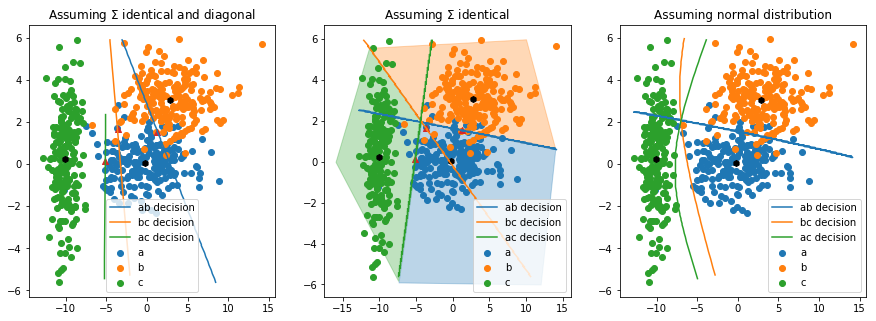

In [3]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from numpy.linalg import inv,det
from scipy import stats
%matplotlib inline

#covariance matrix
cov_a=np.cov(a.T)
cov_b=np.cov(b.T)
cov_c=np.cov(c.T)

#mean computation
mu_a=np.mean(a,0)
mu_b=np.mean(b,0)
mu_c=np.mean(c,0)

#w computation
#assuming cov matrix have equal diagonal terms and 0 off-diagonal
w_ab=mu_a-mu_b
w_ac=mu_a-mu_c
w_bc=mu_b-mu_c

#assuming cov matrix are equal but not diagonal
w_ab_bis=np.dot(inv(cov_a),(mu_a-mu_b))
w_ac_bis=np.dot(inv(cov_a),(mu_a-mu_c))
w_bc_bis=np.dot(inv(cov_b),(mu_b-mu_c))

#x0 computation is the midpoint between two classes
x0_ab=0.5*(mu_a+mu_b)
x0_ac=0.5*(mu_a+mu_c)
x0_bc=0.5*(mu_b+mu_c)

#g computation
data=np.concatenate((a,b,c),0).T
x_max,x_min=np.max(data[0]),np.min(data[0])
y_max,y_min=np.max(data[1]),np.min(data[1])
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
x_list=np.array([xx.ravel(),yy.ravel()]).T
#Identify points where g_i-g_j=0 (decision surface/curve)
g_ab,g_ac,g_bc=[],[],[]
g_ab_bis,g_ac_bis,g_bc_bis=[],[],[]
g_ab_lst,g_ac_lst,g_bc_lst=[],[],[]

#Most general form of g_i for feature x in class i whose covariance is S and mean m 
def g(x,S,m):
    g=-0.5*(x.T@ inv(S) @ x)+0.5*(x.T@ inv(S) @ m)-0.5*(m.T@ inv(S) @ m)+0.5*(m.T@ inv(S) @ x)#+np.log(1/3)+np.log(1/(2*np.pi*np.linalg.det(S))**0.5)-np.log(1/(2*np.pi*det(S))**0.5)
    return g
for x in x_list:
    #general case
    g_ab_3=g(x,cov_a,mu_a)-g(x,cov_b,mu_b)
    g_ac_3=g(x,cov_c,mu_c)-g(x,cov_a,mu_a)
    g_bc_3=g(x,cov_b,mu_b)-g(x,cov_c,mu_c)
    
    #sigma diagonal and equaly distrited
    if abs(np.dot(w_ab.T,(x-x0_ab))) <1e-1:
        g_ab_lst.append(list(x))
    if abs(np.dot(w_ac.T,(x-x0_ac))) <1e-1:
        g_ac_lst.append(list(x))
    if abs(np.dot(w_bc.T,(x-x0_bc))) <1e-1:
        g_bc_lst.append(list(x))        
    
    #sigma i and j equal
    if abs(np.dot(w_ab_bis.T,(x-x0_ab))) <1e-1:
        g_ab_bis.append(list(x))
    if abs(np.dot(w_ac_bis.T,(x-x0_ac))) <1e-1:
        g_ac_bis.append(list(x))
    if abs(np.dot(w_bc_bis.T,(x-x0_bc))) <1e-1:
        g_bc_bis.append(list(x))
    
    #general case
    if abs(g_ab_3) <1e-1:
        g_ab.append(list(x))
    if abs(g_ac_3) <1e-1:
        g_ac.append(list(x))
    if abs(g_bc_3) <1e-1:
        g_bc.append(list(x))

g_ab,g_ac,g_bc=np.array(g_ab),np.array(g_ac),np.array(g_bc)
g_ab_lst,g_ac_lst,g_bc_lst=np.array(g_ab_lst),np.array(g_ac_lst),np.array(g_bc_lst)
g_ab_bis,g_ac_bis,g_bc_bis=np.array(g_ab_bis),np.array(g_ac_bis),np.array(g_bc_bis)

        
#Visualisation
polygon_a = Polygon(np.array([[14,0.63],[-4.37,2],[-7.4,-5.9],[12,-6]]))
pa = PatchCollection([polygon_a], alpha=0.3)
pa.set_color('C0')
polygon_b = Polygon(np.array([[14,0.63],[-4.21,1.93],[-11.38,5.58],[10,6]]))
pb = PatchCollection([polygon_b], alpha=0.3)
pb.set_color('C1')
polygon_c = Polygon(np.array([[-7.46,-5.82],[-4.3,2],[-11.4,5.6],[-16,0]]))
pc = PatchCollection([polygon_c], alpha=0.3)
pc.set_color('C2')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))
ax1.scatter(a[:,0], a[:,1],label='a')
ax1.scatter(b[:,0], b[:,1],label='b')
ax1.scatter(c[:,0], c[:,1],label='c')
ax1.scatter([x0_ab[0],x0_ac[0],x0_bc[0]],[x0_ab[1],x0_ac[1],x0_bc[1]],marker='^')
ax1.scatter([mu_a[0],mu_b[0],mu_c[0]],[mu_a[1],mu_b[1],mu_c[1]],marker='h',color='k')
ax1.plot(g_ab_lst.T[0],g_ab_lst.T[1],label='ab decision')
ax1.plot(g_bc_lst.T[0],g_bc_lst.T[1],label='bc decision')
ax1.plot(g_ac_lst.T[0],g_ac_lst.T[1],label='ac decision')
ax1.legend()
ax1.set_title('Assuming $ \Sigma $ identical and diagonal')

ax2.add_collection(pa)
ax2.add_collection(pb)
ax2.add_collection(pc)
ax2.scatter(a[:,0], a[:,1],label='a')
ax2.scatter(b[:,0], b[:,1],label='b')
ax2.scatter(c[:,0], c[:,1],label='c')
ax2.scatter([x0_ab[0],x0_ac[0],x0_bc[0]],[x0_ab[1],x0_ac[1],x0_bc[1]],marker='^')
ax2.scatter([mu_a[0],mu_b[0],mu_c[0]],[mu_a[1],mu_b[1],mu_c[1]],marker='h',color='k')
ax2.plot(g_ab_bis.T[0],g_ab_bis.T[1],label='ab decision')
ax2.plot(g_bc_bis.T[0],g_bc_bis.T[1],label='bc decision')
ax2.plot(g_ac_bis.T[0],g_ac_bis.T[1],label='ac decision')
ax2.legend()
ax2.set_title('Assuming $ \Sigma $ identical')

ax3.scatter(a[:,0], a[:,1],label='a')
ax3.scatter(b[:,0], b[:,1],label='b')
ax3.scatter(c[:,0], c[:,1],label='c')
ax3.scatter([mu_a[0],mu_b[0],mu_c[0]],[mu_a[1],mu_b[1],mu_c[1]],marker='h',color='k')
ax3.plot(g_ab.T[0],g_ab.T[1],label='ab decision')
ax3.plot(g_bc.T[0],g_bc.T[1],label='bc decision')
ax3.plot(g_ac.T[0],g_ac.T[1],label='ac decision')
ax3.legend()
ax3.set_title('Assuming normal distribution')
plt.show();

#### Measure of precision of general classifier
As the general classification seems to provide the best result, the available data set was seperated in two parts. We verify if the data points are classified correctly. To identify the classification error, we verify at a first step how many points of the training dataset are misclassified, then in a second step we reduce the size of the training set to have an independent set to test the classification on. It would be more precise if the selection of the set is selected randomly, but we assume here that the data was generated randomly, so it is valid to just seperate the sets at a given indice.

- In the complete dataset, 21 of 600 datapoints are misclassified.
 Classification error of 3.50 %
 
- For a dataset of 80% the size of the original set, 19 of 480 datapoints are misclassified 
 Classification error of 3.96 %
 
- For a test dataset of 20% the size of the original set tested with the classification defined on the other 80% of the datapoints, 3 of 120 datapoints are misclassified 
 Classification error of 2.50 %
 
The size of the test and data sets need to be sufficiently large to get a significant estimation of the classification error. It seems using this algorithm the classifaction error lies below 4% for this dataset. If the distribution were truly gaussian, it might be possible to increase this precision further.

Train data set size: (160, 2) (160, 2) (160, 2)
Test data set size: (40, 2) (40, 2) (40, 2)
3 of 120 datapoints are misclassified 
 Classification error of 2.50 %


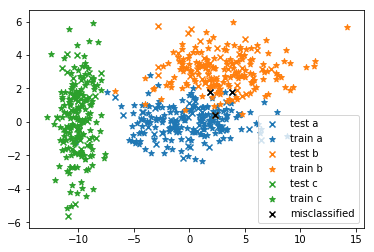

In [4]:
#define test and train sets:
seperate=40
a_test,b_test,c_test=a[:seperate],b[:seperate],c[:seperate]
a_train,b_train,c_train=a[seperate:],b[seperate:],c[seperate:]
print('Train data set size:',a_train.shape, b_train.shape, c_train.shape)
print('Test data set size:',a_test.shape, b_test.shape, c_test.shape)

#covariance matrix
cov_a=np.cov(a_train.T)
cov_b=np.cov(b_train.T)
cov_c=np.cov(c_train.T)

#mean computation
mu_a=np.mean(a_train,0)
mu_b=np.mean(b_train,0)
mu_c=np.mean(c_train,0)

#determine if classification is obtaied correctly.
data_complete=np.concatenate((a_test,b_test,c_test),0)
target_complete=np.concatenate((np.zeros(a_test.shape[0]),np.ones(b_test.shape[0]),2*np.ones(c_test.shape[0])))
errors_complete=0
error_lst=[]
for i,x in enumerate(data_complete):
    g_complete=[g(x,cov_a,mu_a),
                g(x,cov_b,mu_b),
                g(x,cov_c,mu_c)]
    #print(g_complete)
    if target_complete[i] != np.argmax(g_complete):
        errors_complete+=1
        error_lst.append(x)
error_lst=np.array(error_lst) 

#Visualisation
print("%.0f of %.0f datapoints are misclassified \n Classification error of %.2f %%"%(errors_complete, len(target_complete),100*errors_complete/len(target_complete)))
plt.scatter(a[:seperate,0], a[:seperate,1],label='test a',marker='x',color='C0')
plt.scatter(a[seperate:,0], a[seperate:,1],label='train a',marker='*',color='C0')
plt.scatter(b[:seperate,0], b[:seperate,1],label='test b',marker='x',color='C1')
plt.scatter(b[seperate:,0], b[seperate:,1],label='train b',marker='*',color='C1')
plt.scatter(c[:seperate,0], c[:seperate,1],label='test c',marker='x',color='C2')
plt.scatter(c[seperate:,0], c[seperate:,1],label='train c',marker='*',color='C2')
plt.scatter(error_lst.T[0],error_lst.T[1],color="k",marker='x',label='misclassified')
plt.legend();

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.


By neglecting the constants of the complete Bayes classification, two simplified models can be determined. The classification is then made by identifying the class for which the distance is minimal. -> $g_i$ is maximal.

Euclidean distance $d_e=||x-\mu_i || \equiv \Sigma=\sigma^2I$ 

Mahalanobis distance $d_m=((x-\mu_i)\Sigma^{-1}(x-\mu_i))^{1/2} \equiv \Sigma\neq xI$

As we know from section 1.1 that the distributions are non diagonal, here only Mahalanobis distance is tested.

The classification error using all three classes is the same and lies at $2.5%$. Between class a and b the error is larger at $3.75%$. The evaluation is obtained using the same sets used above, to be able to compare. Thus it seems for this set  a valid approximation to assume the constants of $g_i$ to be equal to $0$.

By having a closer look at the two constants:

$ln\left(\frac{1}{\sqrt{2\pi}|\Sigma_i|^{1/2}}\right) \quad ln(P(w_i))$

We notice, one of the constants is dependent on the probability of any point being in class i, thus if the classes have the same size, these constants are negligible, as they are equal for all three classes. Furthermore the second constant is dependent on the distribution of the set $\Sigma$ thus if all the distributions ressemble eachother, meaning having a similar $\Sigma$ the Mahalanobis distance is a classifyier as good as Bayes classifier, and it's advantage is that it is a very simple criterion.

In [5]:
#Since we're doing some test here, better practice to cut dataset in two separate set (1/5 for test and 4/5 for training)
#maybe cross validation later
#random selection would be better, good enough
seperate=40
a_test,b_test,c_test=a[:seperate],b[:seperate],c[:seperate]
a_train,b_train,c_train=a[seperate:],b[seperate:],c[seperate:]
print('Train data set size:',a_train.shape, b_train.shape, c_train.shape)
print('Test data set size:',a_test.shape, b_test.shape, c_test.shape)

#covariance matrix
cov_a=np.cov(a_train.T)
cov_b=np.cov(b_train.T)
cov_c=np.cov(c_train.T)

#mean computation
mu_a=np.mean(a_train,0)
mu_b=np.mean(b_train,0)
mu_c=np.mean(c_train,0)

data=np.concatenate((a_test,b_test),0)
target=np.concatenate((np.zeros(40),np.ones(40)))
#print(data)
#print(target)

data_complete=np.concatenate((a_test,b_test,c_test),0)
target_complete=np.concatenate((np.zeros(40),np.ones(40),2*np.ones(40)))
errors=0

for i,x in enumerate(data):
    distances=[((x-mu_a)@inv(cov_a)@(x-mu_a))**0.5,
               ((x-mu_b)@inv(cov_b)@(x-mu_b))**0.5]
    if target[i] != np.argmin(distances):
        errors+=1
errors_complete=0

for i,x in enumerate(data_complete):
    distances_complete=[((x-mu_a)@inv(cov_a)@(x-mu_a))**0.5,
                        ((x-mu_b)@inv(cov_b)@(x-mu_b))**0.5,
                        ((x-mu_c)@inv(cov_c)@(x-mu_c))**0.5]
    if target_complete[i] != np.argmin(distances_complete):
        errors_complete+=1
        
print("error {:.2f} % with only a and b classes".format(100*(errors/80)))
print("error {:.2f} % with 3 classes".format(100*(errors_complete/120)))


Train data set size: (160, 2) (160, 2) (160, 2)
Test data set size: (40, 2) (40, 2) (40, 2)
error 3.75 % with only a and b classes
error 2.50 % with 3 classes


## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [3]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [4]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)
#print(train_labels.shape)

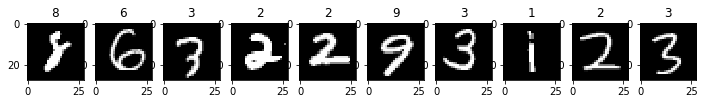

In [5]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('on')
    ax.set_title(lb)

### 2.2 MLP
The below implemented MLP is based on scikit learn's example of a [Supervised Neural network models](http://scikit-learn.org/stable/modules/neural_networks_supervised.html). This model is rather slow, however it provides a good classification, if the parameter alpha representing the regularisation is well chosen, to prevent overfitting. This is why we did the classification for different alphas to find the best fit of this parameter. For our dataset this was found to be between 1 and 5 and thus we have a classification with an error as low as 0.5%. No matter which iteration.

_In order not to overload the Notebook, this computation has been done in console. And then the errors are imported for the different alphas. The code used for this is given below._

It is noticeable, that for the same alpha and witout changing other parameters not allways the same classification is obtained. This effect is due the training process. At each iteration, the solver moves the parameters in a direction that minimize loss and continue computation until convergence. However the parameters modification themselves are not always the same and at each iteration its a complete new set of parameters that is produced as one of the best model. However, it seems that by choosing the alpha conveniently, the error seems to be controllable. 

In [25]:
import pickle
def MLP(al):
    #input x: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
    #100 hidden units h.
    #10 output units y, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit i
    from sklearn.neural_network import MLPClassifier
    train=[train_images[i].flatten() for i in range(train_images.shape[0]) if train_labels[i]!=9]
    train_labels2=[label for label in train_labels if label!=9]
    print(np.array(train_labels2).shape)
    print(np.array(train).shape)
    test=[test_images[i].flatten() for i in range(test_images.shape[0]) if test_labels[i]!=9]
    test_labels2=test_labels!=9
    clf = MLPClassifier(solver='adam', alpha=al,hidden_layer_sizes=(100, 10),verbose=True)
    clf.fit(train, train_labels2)
    pickle.dump(clf, open( "model.p", "wb" ) )
    pred=clf.predict(test)
    print(pred)
    noerror=(test_labels2 != pred).sum()/600
    print("error {:.2f} %".format(noerror))
    return noerror
MLP(2);

(54051,)
(54051, 784)
Iteration 1, loss = 3.05748125
Iteration 2, loss = 2.49124690
Iteration 3, loss = 2.18392916
Iteration 4, loss = 1.63466889
Iteration 5, loss = 1.23242428
Iteration 6, loss = 1.02778212
Iteration 7, loss = 0.90133205
Iteration 8, loss = 0.75440760
Iteration 9, loss = 0.61589266
Iteration 10, loss = 0.49583828
Iteration 11, loss = 0.42769166
Iteration 12, loss = 0.36983474
Iteration 13, loss = 0.32781831
Iteration 14, loss = 0.29309286
Iteration 15, loss = 0.25946880
Iteration 16, loss = 0.23318618
Iteration 17, loss = 0.20958518
Iteration 18, loss = 0.19914485
Iteration 19, loss = 0.17566994
Iteration 20, loss = 0.16567766
Iteration 21, loss = 0.16437008
Iteration 22, loss = 0.15346442
Iteration 23, loss = 0.14572082
Iteration 24, loss = 0.14622099
Iteration 25, loss = 0.13863471
Iteration 26, loss = 0.13741304
Iteration 27, loss = 0.12355238
Iteration 28, loss = 0.12746635
Iteration 29, loss = 0.13052243
Iteration 30, loss = 0.12652912
Training loss did not impro

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


AttributeError: 'bool' object has no attribute 'sum'

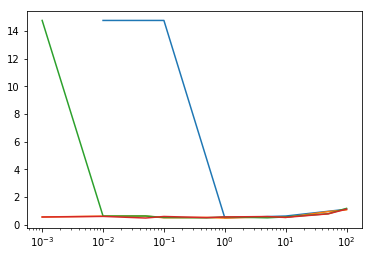

In [34]:
alpha=[0.01, 0.1, 1, 10, 100];
err=[14.775, 14.775, 0.5016666666666667, 0.6316666666666667, 1.1233333333333333];
alpha2=[0.001,0.01,0.05, 0.1, 0.5, 1, 5,10,50, 100];
err2=[0.5633333333333334, 0.6233333333333333, 0.6316666666666667, 0.505, 0.5333333333333333, 0.4816666666666667, 0.575,0.53,0.9533333333333334,1.08]
err3=[14.775, 0.63, 0.6366666666666667, 0.526666666666666, 0.505, 0.565, 0.505, 0.5683333333333334, 0.7983333333333333, 1.185]
err4=[0.5616666666666666, 0.605, 0.48833333333333334, 0.6, 0.5183333333333333, 0.5666666666666667, 0.595, 0.535, 0.79, 1.1316666666666666]
#computed by
#err=[];
#for a in alpha:
#	err.append(MLP(a))

plt.loglog(alpha,err)
plt.loglog(alpha2,err2)
plt.loglog(alpha2,err3)
plt.loglog(alpha2,err4)
plt.yscale('linear')
plt.set_xlabel='alpha'
plt.set_ylabel='err [%]'
plt.show()